# Hotel Data Analysis Report
Your boss wants a report to understand the relationship between average daily rate for hotels and the lead time before booking. 
1. You need to compile a collection of excel sheets into a single dataset and filter out cancellations
2. Create a simple linear regression between these two variables. 

In [10]:
# bring in our libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [11]:
#bring in our data
df1 =pd.read_excel("C:/GitHub/Machine-Learning/data/hotel_revenue_historical_full.xlsx",sheet_name="2018")
df2 =pd.read_excel("C:/GitHub/Machine-Learning/data/hotel_revenue_historical_full.xlsx",sheet_name="2019")
df3 =pd.read_excel("C:/GitHub/Machine-Learning/data/hotel_revenue_historical_full.xlsx",sheet_name="2020")
full_dataset =pd.concat([df1,df2,df3],ignore_index=True)


In [12]:
full_dataset.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17
141946,City Hotel,1,0,2020,August,31,2,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.0,0,1,No-Show,2020-08-02


In [13]:
full_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
full_dataset['is_canceled'].value_counts()

is_canceled
0    89108
1    52839
Name: count, dtype: int64

In [ ]:
filtered_data = full_dataset[full_dataset['is_canceled']!=1]
filtered_data.to_csv('filtered_hotel_dataset.csv')

In [31]:
df = pd.read_csv("C:/GitHub/Machine-Learning/data/filtered_hotel_dataset.csv")
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,7951,Resort Hotel,0,342,2018,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-07-01
1,7952,Resort Hotel,0,737,2018,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-07-01
2,7953,Resort Hotel,0,7,2018,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2018-07-02
3,7954,Resort Hotel,0,13,2018,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2018-07-02
4,7955,Resort Hotel,0,14,2018,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2018-07-03


C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\2184026110.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['adr'])


<Axes: xlabel='adr', ylabel='Density'>

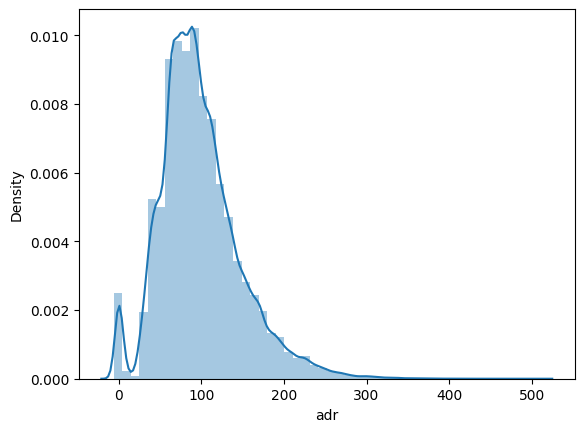

In [16]:
# univiarate and bivariate analysis
sns.distplot(filtered_data['adr'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\3017803803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\3017803803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

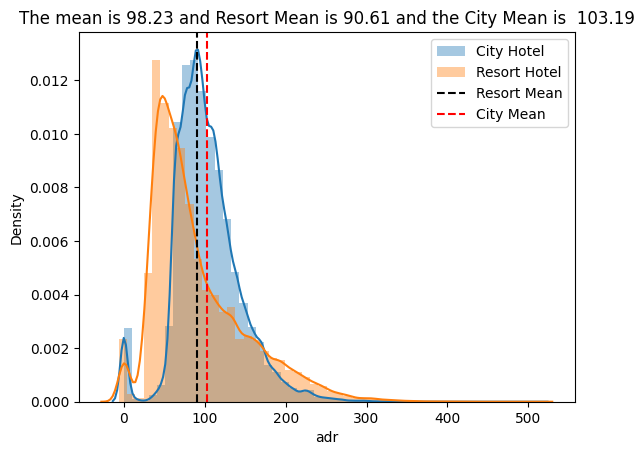

In [17]:
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean =filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['adr'].mean()
plt.axvline(resort_mean,color='black',linestyle="--",label='Resort Mean')
plt.axvline(city_mean,color='red',linestyle="--",label='City Mean')
plt.title(f"The mean is {filtered_data['adr'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean: .2f}");
plt.legend()
plt.savefig('ADR_distribution.png')

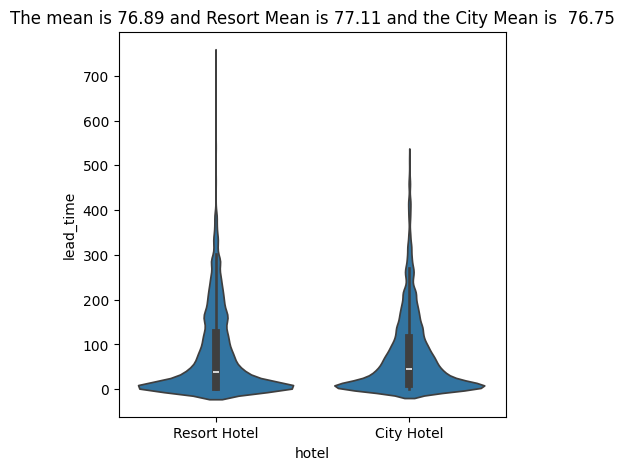

In [18]:
plt.figure(figsize=(5,5))
sns.violinplot(data =filtered_data,y='lead_time',x='hotel')
resort_mean =filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean: .2f}");

<Axes: xlabel='lead_time', ylabel='adr'>

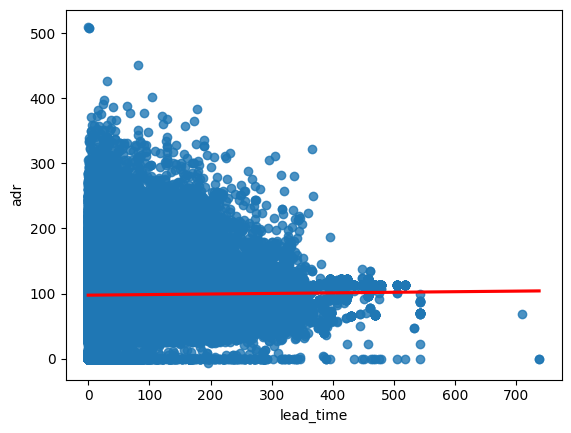

In [29]:
#bivariate analysis and linear Regression
sns.regplot(data = filtered_data,y='adr',x='lead_time',line_kws={'color':'red'})

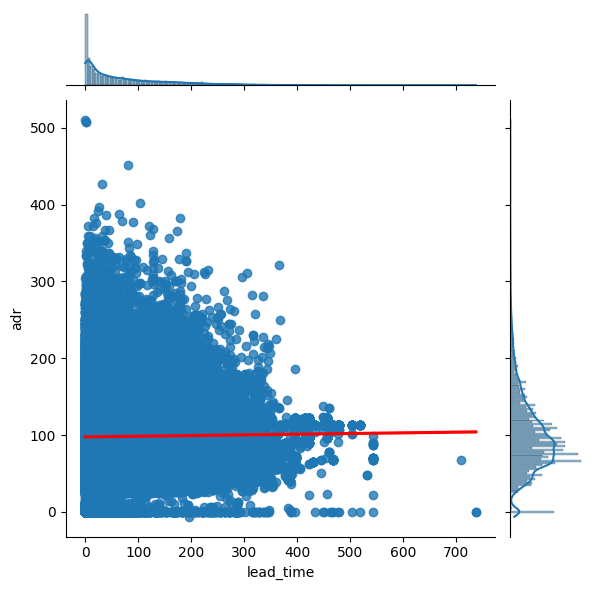

In [20]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='reg',joint_kws={'line_kws':{'color':'red'}})

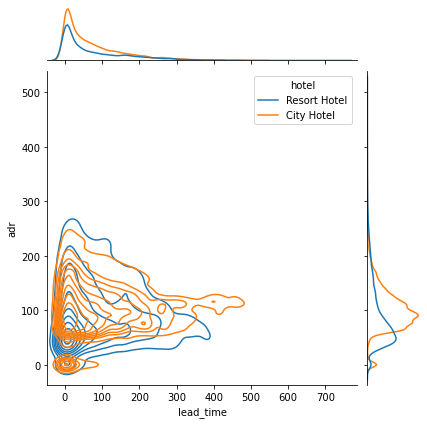

In [ ]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='kde',hue='hotel')

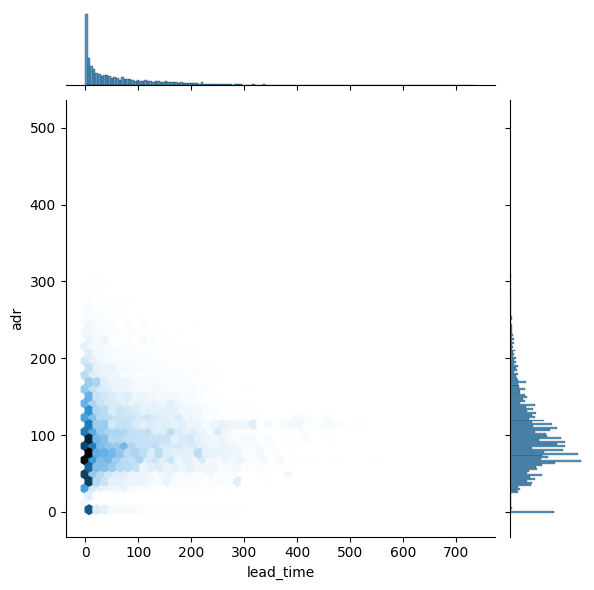

In [21]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='hex')

In [27]:
#linear Regression
linregress(filtered_data['lead_time'],filtered_data['adr'])


LinregressResult(slope=np.float64(0.008855843930593446), intercept=np.float64(97.54811713144225), rvalue=np.float64(0.016122313985460043), pvalue=np.float64(1.4874734271358465e-06), stderr=np.float64(0.001839893371979956), intercept_stderr=np.float64(0.215970006450331))

In [23]:
#linear Regression
slope =linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept =linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2=linregress(filtered_data['lead_time'],filtered_data['adr'])[2]
regression_table = pd.DataFrame({'Name':['slope','intercept','r2'],'Values':[slope,intercept,r2]})
regression_table

,Name,Values
0,slope,0.008856
1,intercept,97.548117
2,r2,0.016122
